<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Assignment_Forecasting_Airlines%2BData_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecast the Airlines Passengers data set. Prepare a document for each model explaining
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for
Forecasting.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ad = pd.read_excel('Airlines+Data.xlsx',header=0,parse_dates=True)
ad

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
ad.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [ ]:
ad.set_index('Month',inplace=True)

In [ ]:
ad[ad.duplicated()].shape

(16, 1)

In [ ]:
ad[ad.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [ ]:
ad.drop_duplicates()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


{'whiskers': [<matplotlib.lines.Line2D at 0x7b256c63efb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b256c63f4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b256c63ed10>],
 'medians': [<matplotlib.lines.Line2D at 0x7b256c63fa30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b256c63fcd0>],
 'means': []}

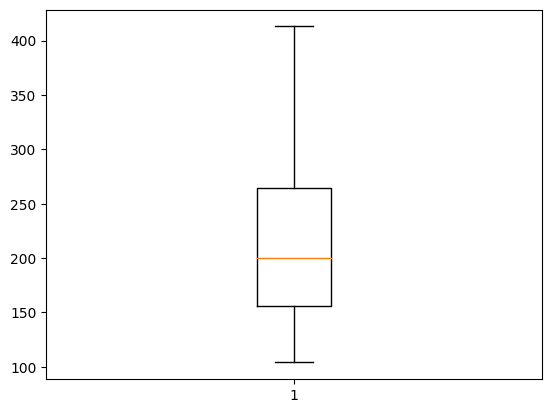

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.boxplot(ad['Passengers'])

In [ ]:
ad['Passengers'].dtype

dtype('int64')

<Axes: xlabel='Month'>

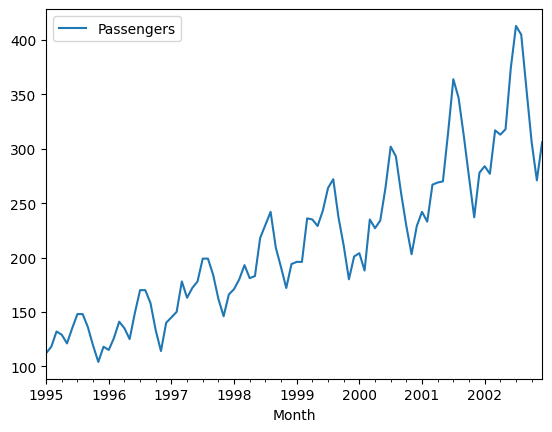

In [ ]:
#Line Plot indicates upward trend with multiplicative seasonality
ad.plot()


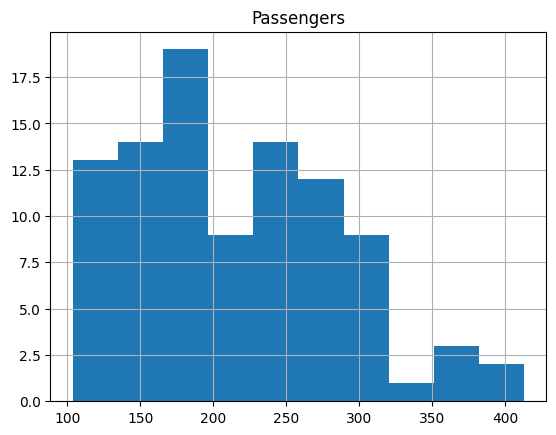

In [ ]:
#Histogram
ad.hist("Passengers")
plt.show()

<Axes: ylabel='Density'>

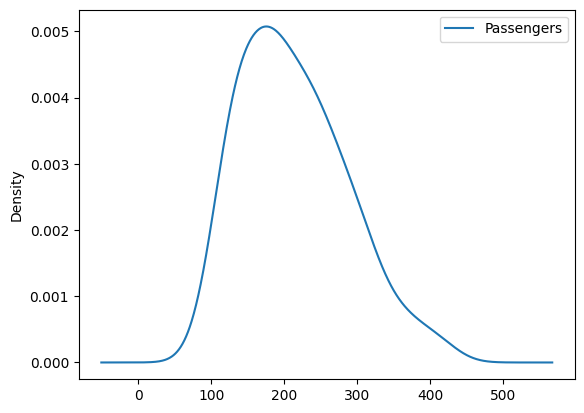

In [ ]:
#Kernel Density Estimation Plot
ad.plot(kind='kde')

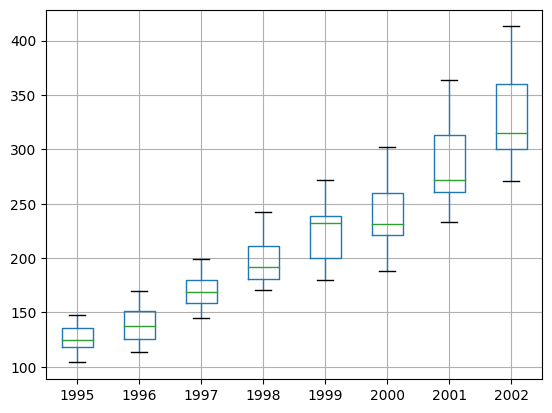

In [ ]:
# Boxplots of yearly data
from pandas import DataFrame
from pandas import Grouper
ad = pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True, squeeze=2)
groups = ad.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

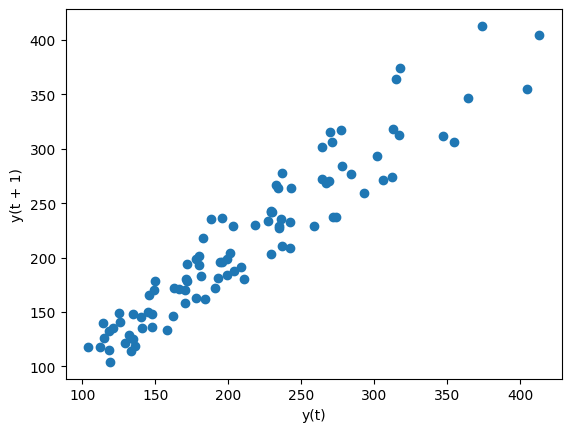

In [ ]:
#Lag Plot
from pandas.plotting import lag_plot
lag_plot(ad)
plt.show()

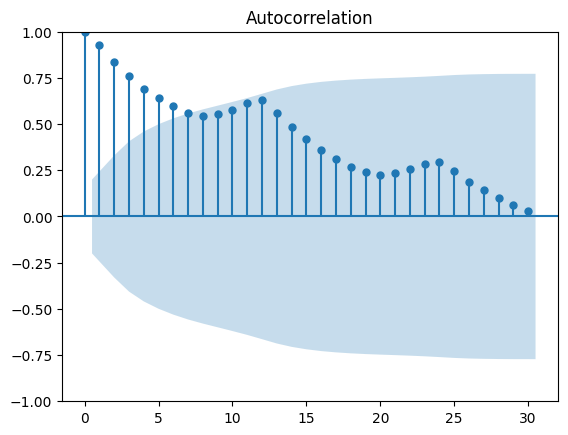

In [ ]:
#Auto Correlatio Function Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ad,lags=30)
plt.show()

In [ ]:
#UpSample data
from pandas import datetime
upsampled = ad.resample('D').mean()
upsampled

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
              ...  
2002-11-27      NaN
2002-11-28      NaN
2002-11-29      NaN
2002-11-30      NaN
2002-12-01    306.0
Freq: D, Name: Passengers, Length: 2892, dtype: float64

In [ ]:
#Interpolate .Upsampled data has similar trend and seasonality pattern as monthly data
interpolated = upsampled.interpolate(method='linear')
interpolated.head(20)
interpolated1=pd.DataFrame(interpolated)
interpolated1

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


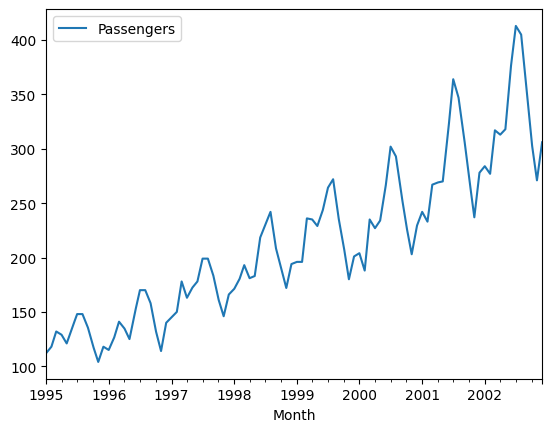

In [ ]:
interpolated1.plot()
plt.show()

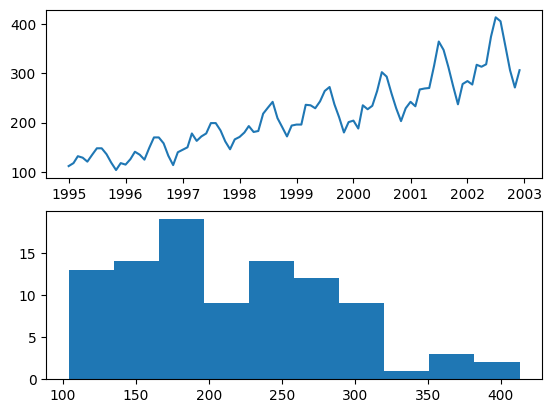

In [ ]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.plot(ad)
pyplot.subplot(212)
pyplot.hist(ad)
pyplot.show()

In [ ]:
#Down Sampling
resample = ad.resample('Q')
quarterly_mean_passengers = resample.mean()
quarterly_mean_passengers

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
1996-06-30    136.333333
1996-09-30    166.000000
1996-12-31    129.000000
1997-03-31    157.666667
1997-06-30    171.000000
1997-09-30    194.000000
1997-12-31    158.000000
1998-03-31    181.333333
1998-06-30    194.000000
1998-09-30    227.000000
1998-12-31    185.666667
1999-03-31    209.333333
1999-06-30    235.666667
1999-09-30    257.666667
1999-12-31    197.333333
2000-03-31    209.000000
2000-06-30    241.666667
2000-09-30    284.666667
2000-12-31    220.333333
2001-03-31    247.333333
2001-06-30    284.666667
2001-09-30    341.000000
2001-12-31    263.000000
2002-03-31    292.666667
2002-06-30    335.000000
2002-09-30    391.000000
2002-12-31    294.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64


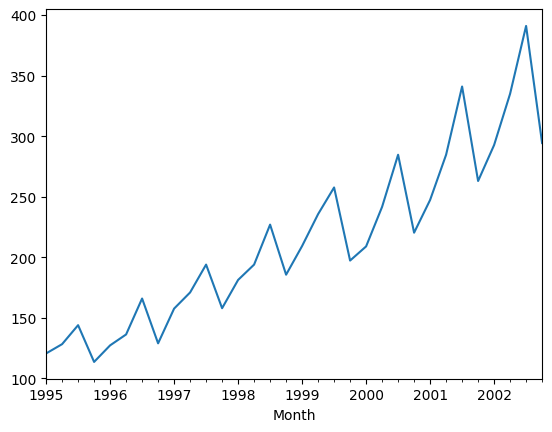

In [ ]:
#Upward trend with multiplicative seasonality similar to orginal data
print(quarterly_mean_passengers.head())
quarterly_mean_passengers.plot()
pyplot.show()

In [ ]:
#Square Root Transformation
from numpy import sqrt
dataframe = DataFrame(ad.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

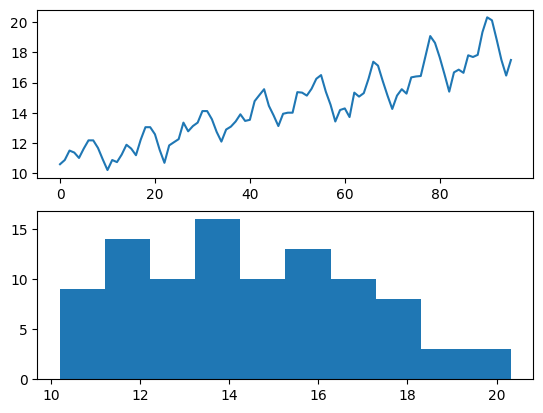

In [ ]:
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

In [ ]:
# Log Transformation
from numpy import log
dataframe = DataFrame(ad.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

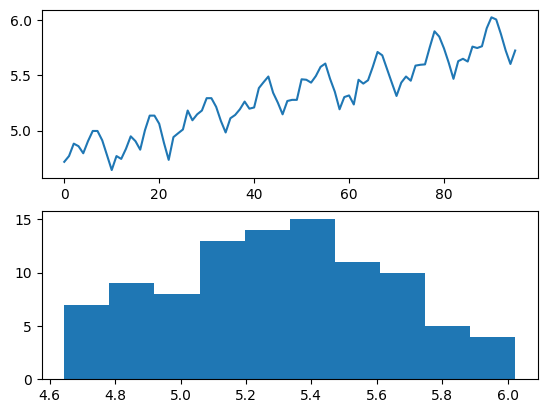

In [ ]:
# Histogram looks somewhat a normal distribution
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

In [ ]:
interpolated1.shape

(2892, 1)

In [ ]:
#Split data set into train and test
Train = interpolated1.head(2200)
Test = interpolated1.tail(692)

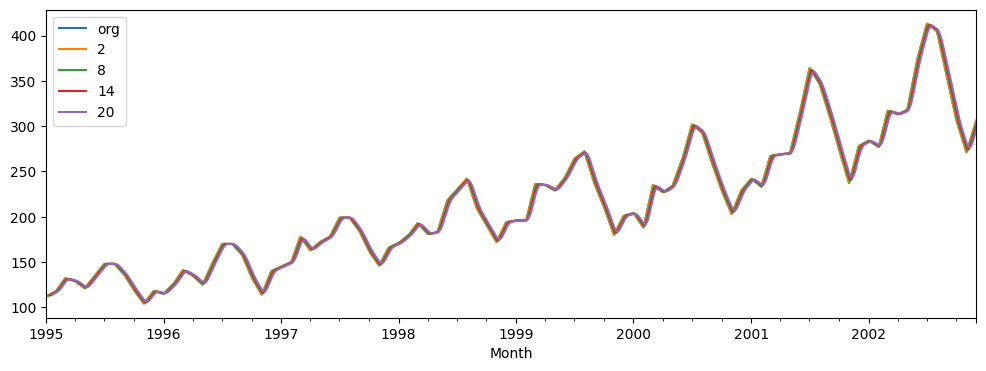

In [ ]:
#Moving Average with interpolated
plt.figure(figsize=(12,4))
interpolated1.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [ ]:
ad1=pd.DataFrame(ad)
ad1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


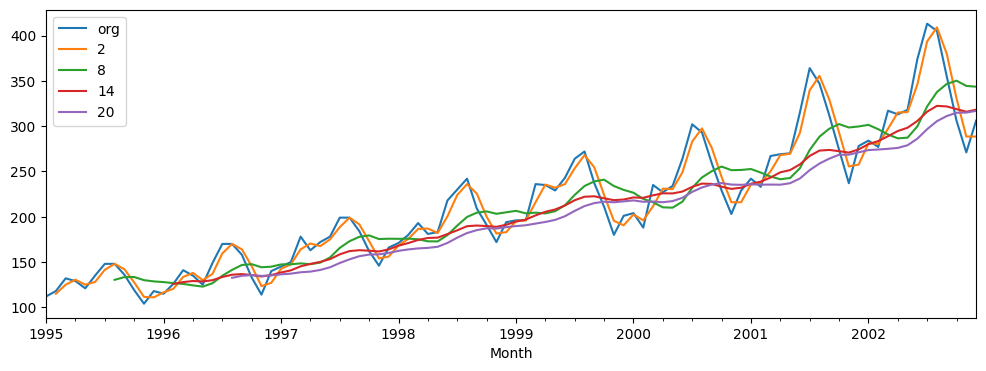

In [ ]:
#Moving Average original data shows Long term trend and seasonality
plt.figure(figsize=(12,4))
ad1.Passengers.plot(label="org")
for i in range(2,24,6):
    ad1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

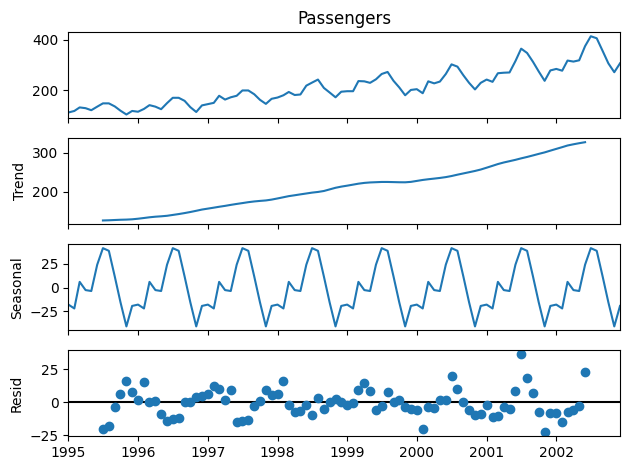

In [ ]:
#Seasonal decomposition. There is trend and sesonality
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
decompose_ts_add = seasonal_decompose(ad1.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

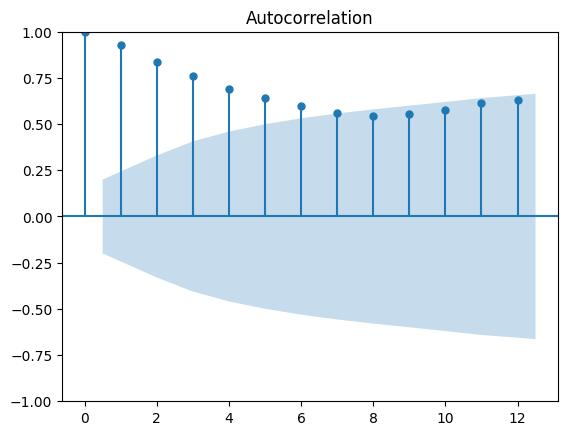

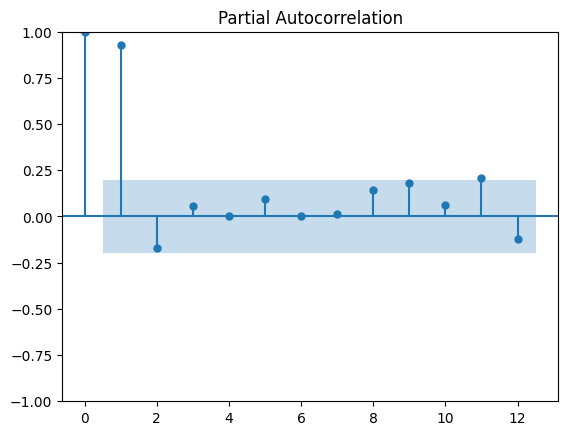

In [ ]:
#ACF & PACF Plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(ad1.Passengers,lags=12)
tsa_plots.plot_pacf(ad1.Passengers,lags=12)
plt.show()

In [ ]:
#Applying simple expo smoothing tech, holts and holts winter method calc MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100 # Absolute %
    return np.mean(temp)  # mean


In [ ]:
Train["Passengers"] = Train["Passengers"].astype('double')
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


20.487248193739852

In [ ]:
# Holt method
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


36.61046313442005

In [ ]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

50.070042031417216

In [ ]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

50.21813400855471

Holts winter exponential smoothing with additive seasonality and additive trend used on entire data

In [ ]:
ad1["Passengers"] = ad1["Passengers"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(ad1["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
hwe_model_add_add.forecast(10)

2001-01-09    239.689045
2001-01-10    239.413361
2001-01-11    239.134228
2001-01-12    238.869116
2001-01-13    238.609825
2001-01-14    238.339920
2001-01-15    238.093240
2001-01-16    237.835253
2001-01-17    237.567680
2001-01-18    237.298078
Freq: D, dtype: float64

In [ ]:
ad1

,Passengers
Month,
1995-01-01,112.0
1995-02-01,118.0
1995-03-01,132.0
1995-04-01,129.0
1995-05-01,121.0
...,...
2002-08-01,405.0
2002-09-01,355.0
2002-10-01,306.0


In [ ]:
ad1.reset_index(inplace=True)

In [ ]:
ad1['t'] = 1
ad1

,Month,Passengers,t
0,1995-01-01,112.0,1
1,1995-02-01,118.0,1
2,1995-03-01,132.0,1
3,1995-04-01,129.0,1
4,1995-05-01,121.0,1
...,...,...,...
91,2002-08-01,405.0,1
92,2002-09-01,355.0,1
93,2002-10-01,306.0,1
94,2002-11-01,271.0,1


In [ ]:
for i,row in ad1.iterrows():
  ad1['t'].iloc[i] = i+1


In [ ]:
ad1

,Month,Passengers,t
0,1995-01-01,112.0,1
1,1995-02-01,118.0,2
2,1995-03-01,132.0,3
3,1995-04-01,129.0,4
4,1995-05-01,121.0,5
...,...,...,...
91,2002-08-01,405.0,92
92,2002-09-01,355.0,93
93,2002-10-01,306.0,94
94,2002-11-01,271.0,95


In [ ]:
ad1['t_sq'] = (ad1['t'])**2
ad1

,Month,Passengers,t,t_sq
0,1995-01-01,112.0,1,1
1,1995-02-01,118.0,2,4
2,1995-03-01,132.0,3,9
3,1995-04-01,129.0,4,16
4,1995-05-01,121.0,5,25
...,...,...,...,...
91,2002-08-01,405.0,92,8464
92,2002-09-01,355.0,93,8649
93,2002-10-01,306.0,94,8836
94,2002-11-01,271.0,95,9025


In [ ]:
#Month and year selection
ad1["Date"] = pd.to_datetime(ad1.Month,format="%b-%y")
ad1["month"] = ad1.Date.dt.strftime("%b")
ad1["year"] = ad1.Date.dt.strftime("%Y")
ad1

,Month,Passengers,t,t_sq,Date,month,year
0,1995-01-01,112.0,1,1,1995-01-01,Jan,1995
1,1995-02-01,118.0,2,4,1995-02-01,Feb,1995
2,1995-03-01,132.0,3,9,1995-03-01,Mar,1995
3,1995-04-01,129.0,4,16,1995-04-01,Apr,1995
4,1995-05-01,121.0,5,25,1995-05-01,May,1995
...,...,...,...,...,...,...,...
91,2002-08-01,405.0,92,8464,2002-08-01,Aug,2002
92,2002-09-01,355.0,93,8649,2002-09-01,Sep,2002
93,2002-10-01,306.0,94,8836,2002-10-01,Oct,2002
94,2002-11-01,271.0,95,9025,2002-11-01,Nov,2002


In [ ]:
ad2 = pd.get_dummies(ad1['month'])
ad2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
months = ad2[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [ ]:
airlines = pd.concat([ad1,months],axis=1)
airlines

,Month,Passengers,t,t_sq,Date,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112.0,1,1,1995-01-01,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118.0,2,4,1995-02-01,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132.0,3,9,1995-03-01,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129.0,4,16,1995-04-01,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121.0,5,25,1995-05-01,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405.0,92,8464,2002-08-01,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355.0,93,8649,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306.0,94,8836,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271.0,95,9025,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


<Axes: xlabel='month', ylabel='year'>

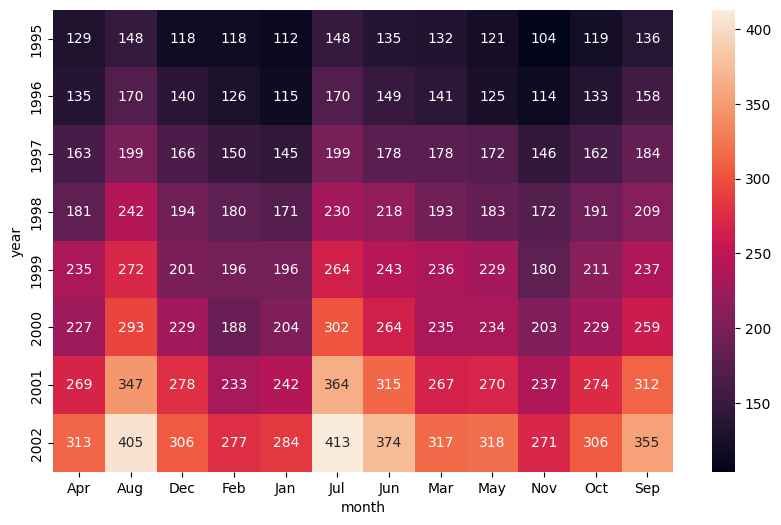

In [ ]:
#Heatmap
plt.figure(figsize=(10,6))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<Axes: xlabel='year', ylabel='Passengers'>

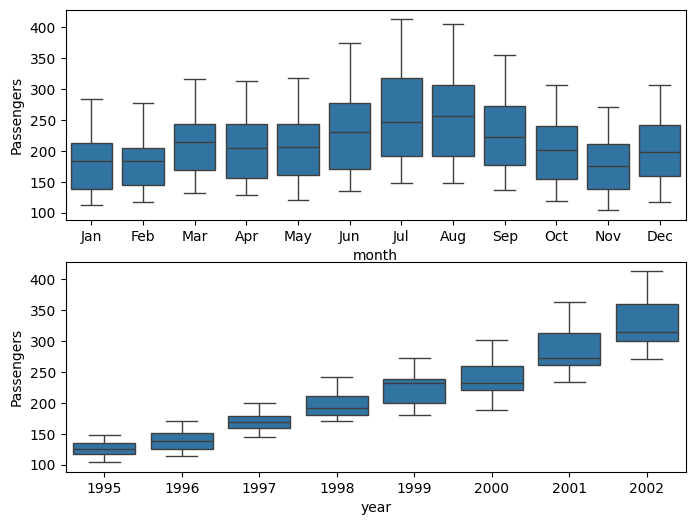

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airlines)

<Axes: xlabel='year', ylabel='Passengers'>

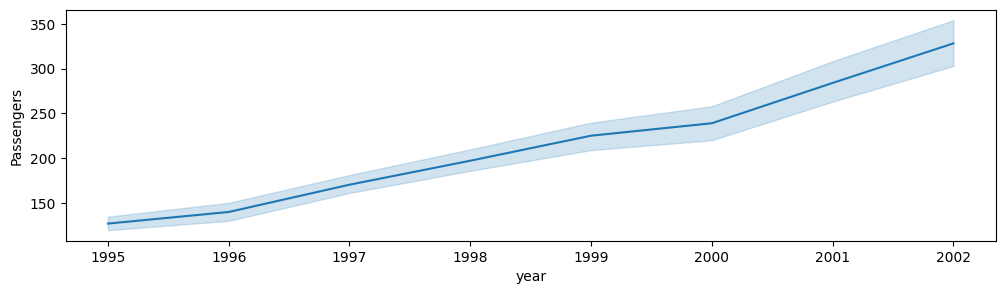

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airlines)

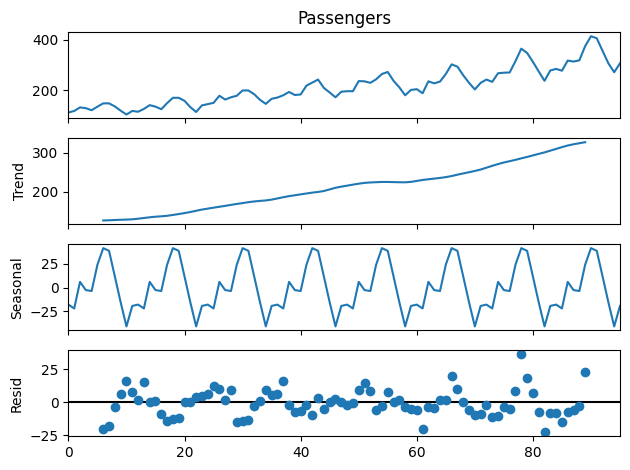

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(airlines.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [ ]:
airlines.shape

(96, 19)

In [ ]:
Train = airlines.head(77)
Test = airlines.tail(19)

In [ ]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.14854431950878

In [ ]:
airlines['log_Passengers'] = np.log(airlines['Passengers'])
airlines.head()

,Month,Passengers,t,t_sq,Date,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_Passengers
0,1995-01-01,112.0,1,1,1995-01-01,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118.0,2,4,1995-02-01,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132.0,3,9,1995-03-01,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129.0,4,16,1995-04-01,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121.0,5,25,1995-05-01,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791


In [ ]:
Train = airlines.head(77)
Test = airlines.tail(19)

In [ ]:
#Exponential Model
import statsmodels.formula.api as smf
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


47.889654251840064

In [ ]:
#Quadratic .t+tsquare

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.92632852818895

In [ ]:
#Additive seasonality for all the months.

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

133.31540360112714

In [ ]:
#Quadratic with Additive Seasonality model

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.61752923079128

In [ ]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

138.7571524741708

In [ ]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

12.183266271786238

In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,12.183266
4,rmse_add_sea_quad,39.617529
1,rmse_Exp,47.889654
0,rmse_linear,58.148544
2,rmse_Quad,58.926329
3,rmse_add_sea,133.315404
5,rmse_Mult_sea,138.757152


Multiplicative Model with Addictive Seasonality has the least RMSE is the best model to predict for the entire dataset

In [ ]:
Model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = airlines).fit()

In [ ]:
pred_model  = pd.Series(Model_full.predict(airlines))
pred_model

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [ ]:
pred_model=np.exp(pred_model)
pred_model

0     109.176148
1     110.331245
2     127.315234
3     123.200587
4     122.399578
         ...    
91    394.784174
92    353.576683
93    310.439400
94    272.472660
95    312.337712
Length: 96, dtype: float64